In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
import re
def rrstr(x,n=2): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')
pd.set_option('future.no_silent_downcasting', True)


# 1. Загрузите данные по вариантам в ноутбук.

In [2]:
df = pd.read_excel("Вариант 1.xlsx",header=2)
df = df.drop(df.index[-1])
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.0,24.0
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
3043,3044.0,146.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0


# 2. Сделайте описательную статистику полученных данных.

In [3]:
df.describe()

,№,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.0
mean,1524.500000,138.753281,340.787730,43.573491,72.769029,24.0
std,880.026136,41.793413,39.077186,8.931816,13.664908,0.0
min,1.000000,104.000000,101.000000,8.000000,20.000000,24.0
25%,762.750000,126.000000,339.000000,38.000000,64.000000,24.0
50%,1524.500000,144.000000,342.000000,45.000000,72.000000,24.0
75%,2286.250000,148.000000,346.000000,50.000000,82.000000,24.0
max,3048.000000,1106.000000,706.000000,58.000000,100.000000,24.0


# 3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [4]:
percentage1 = (df['Балл'] < df['Балл'].mean()).sum()/len(df['Балл']) * 100
print(f'Процент учащихся, выполнивших работу ниже среднего равен {percentage1.round(2)}%')

Процент учащихся, выполнивших работу ниже среднего равен 51.28%


# 4. Найти процент учащихся не сдавших экзамен.

In [5]:

percentage2 = (df['Балл']<df['Минимальный балл']).sum()/len(df['Балл']) * 100
print(f'Процент учащихся, не сдавших экзамен равен {percentage2.round(2)}%')

Процент учащихся, не сдавших экзамен равен 0.13%


# 5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

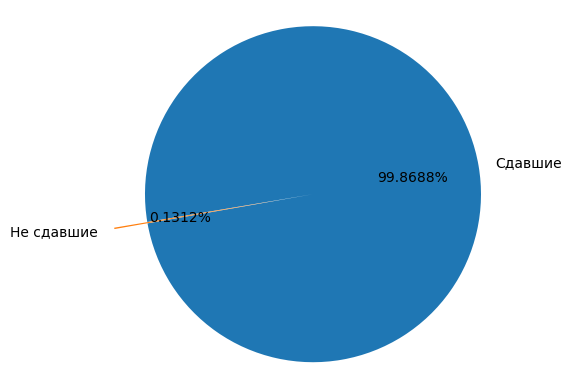

In [6]:

plt.pie(pd.Series(np.array([(df['Балл']>=df['Минимальный балл']).sum(),(df['Балл']<df['Минимальный балл']).sum()])), labels=['Cдавшие', 'Hе сдавшие'],
        autopct='%.4f%%', startangle=190,explode=[0.2]+[0])

plt.axis('equal')
plt.show()


# 6. Постройте ядерную оценку плотности распределению баллов за экзамен. 

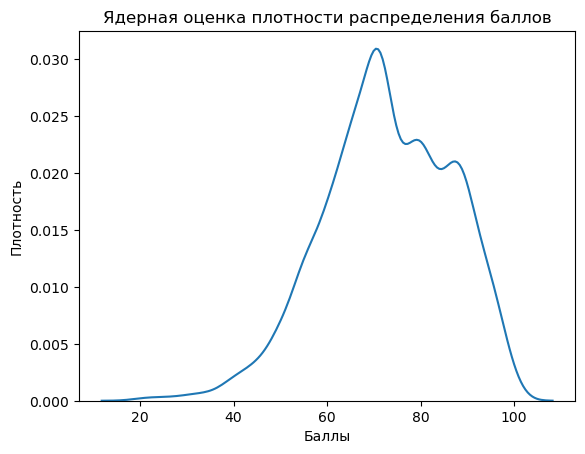

In [7]:
sns.kdeplot(df['Балл'])
plt.title('Ядерная оценка плотности распределения баллов')
plt.xlabel('Баллы')
plt.ylabel('Плотность')
plt.show()

# 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [8]:
stat = np.array([(df['Балл']>=86).sum(),((df[df['Балл']>=71])['Балл']<86).sum(),((df[df['Балл']>=51])['Балл']<71).sum(),(df['Балл']<=50).sum()])
marks = np.array('«отлично», «хорошо», «удовлетворительно», «неудовлетворительно»'.split(','))
stati = pd.DataFrame(stat/sum(stat)*100,marks)
stati[0] = stati[0].transform(lambda x: rrstr(x)+'%')
stati

,0
«отлично»,"20,28%"
«хорошо»,"36,88%"
«удовлетворительно»,"37,20%"
«неудовлетворительно»,"5,64%"


# 8. Какое процентное соотношение юношей и девушек писало данный экзамен? 

In [9]:
pd.DataFrame((df.groupby('Пол').agg('count').iloc[:,0]/df.shape[0]).transform(lambda x: rrstr(100*x)+'%'))

,№
Пол,
Ж,"57,97%"
М,"42,03%"


# 9. Сколько школ принимало участие в экзамене?

In [10]:
len(df.groupby('№ школы')['№'].agg('count'))

24

# 10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [11]:
pd.DataFrame(np.array([len(max(df['Задания с кратким ответом'],key=len)),len(max(df['Задания с развёрнутым ответом'],key=len))//4]),np.array(['Заданий с кратким ответом', 'Заданий с развернутым ответом']))


,0
Заданий с кратким ответом,25
Заданий с развернутым ответом,12


# 11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 

In [12]:
minor_tasks = pd.DataFrame(list(df['Задания с кратким ответом'].transform(lambda x: [i for i in x])),columns=([f'B_{i+1}' for i in range(25)])).astype(dict(zip(['B_1','B_15','B_7','B_25'],['int','int','int','int'])))
pd.DataFrame(np.array([str(round(100*Counter(list(minor_tasks[f'B_{i+1}'].replace('+',5).replace('-',0)))[max(Counter(list(minor_tasks[f'B_{i+1}'].replace('+',5).replace('-',0))))]/sum(list(Counter(list(minor_tasks[f'B_{i+1}'].replace('+',5).replace('-',0))).values())),2))+'%' for i in range(25)]),([f'B_{i+1}' for i in range(25)]))

,0
B_1,81.69%
B_2,92.88%
B_3,87.34%
B_4,77.3%
B_5,58.96%
B_6,90.62%
B_7,50.66%
B_8,75.59%
B_9,84.12%
B_10,96.88%


# 12 Аналогично и с типом С (ответы с развернутым ответом)

In [13]:
major_tasks = pd.DataFrame(list(df['Задания с развёрнутым ответом'].transform(lambda x: [i for i in x])),columns=([f'C_{i*0.25+1}' for i in range(48)])).drop([f'C_{i*0.25+1}' for i in range(48) if (i*0.25+1)%1!=0], axis=1)
pd.DataFrame(np.array([str(round(100*Counter(list(major_tasks[f'C_{(i+1)/1}']))[max(Counter(list(major_tasks[f'C_{(i+1)/1}'])))]/sum(Counter(list(major_tasks[f'C_{(i+1)/1}'])).values()),2))+'%' for i in range(len(major_tasks.columns))]),major_tasks.columns)

,0
C_1.0,96.75%
C_2.0,47.51%
C_3.0,94.46%
C_4.0,61.35%
C_5.0,67.29%
C_6.0,25.69%
C_7.0,41.34%
C_8.0,22.9%
C_9.0,32.05%
C_10.0,22.28%


# 13. Сделайте анализ по двум школам:

In [14]:
s1,s2 = random.choices(list(pd.DataFrame(df.groupby('№ школы')['№'].agg('count')).index),k=2)
s1,s2

(141.0, 114.0)

## 1. по всем выполненным заданиям типа В


### Вариант 1

In [15]:
def analysys_by_b(s1,s2):
    def give_b_perc_by_s_n(s_n):
        return np.array(list(str(round(100*Counter(i)[max(Counter(i))]/sum(Counter(i).values()),2))+'%' for i in (df.groupby('№ школы')['Задания с кратким ответом'].agg(lambda x: list(zip(*[list(i.replace('+','5').replace('-','0')) for i in x])))[[s_n]][s_n])))
        
    return pd.DataFrame(np.array(list(zip(*np.vstack((give_b_perc_by_s_n(s1),give_b_perc_by_s_n(s2)))))),index=([f'B_{i+1}' for i in range(25)]),columns=[f'№{s1}',f'№{s2}'])
analysys_by_b(s1,s2)

,№141.0,№114.0
B_1,86.76%,64.29%
B_2,85.29%,88.1%
B_3,88.24%,76.19%
B_4,88.24%,69.05%
B_5,55.88%,45.24%
B_6,91.18%,88.1%
B_7,48.53%,23.81%
B_8,76.47%,57.14%
B_9,79.41%,64.29%
B_10,95.59%,95.24%


### Вариант 2

In [16]:
def analysys_by_b_2(s1,s2):
    def give_b_g_100_perc_by_s_n(s_n):
        return str(round(100*sum(p:=np.array(df.groupby('№ школы')['Задания с кратким ответом'].agg(lambda x: [sum([int(j) for j in list(i.replace('+','1').replace('-','0'))])/34 if sum([int(j) for j in list(i.replace('+','1').replace('-','0'))])/34==1.0 else 0 for i in x])[[s_n]][s_n]))/len(p),2))+'%'
    
    return pd.DataFrame(np.array([give_b_g_100_perc_by_s_n(s1),give_b_g_100_perc_by_s_n(s2)]).reshape((1,2)),index=['Процент учеников выполнивших все задания B'],columns=[f'№{s1}',f'№{s2}'])
analysys_by_b_2(s1,s2)

,№141.0,№114.0
Процент учеников выполнивших все задания B,2.94%,2.38%


## 2. по заданиям типа С больше 50%

### Вариант 1

In [17]:
def analysys_by_c_50(s1,s2):
    def give_c_perc_by_s_n(s_n):
        return np.array(list(100*Counter(i)[max(Counter(i))]/sum(Counter(i).values())for i in df.groupby('№ школы')['Задания с развёрнутым ответом'].agg(lambda x: list(zip(*[list(''.join([i[0] for i in re.findall(r'\d\(\d\)',j)]))  for j in x])))[[s_n]][s_n]))
    
    new1= give_c_perc_by_s_n(s1).copy()
    mask1=give_c_perc_by_s_n(s1)>50
    new1[~mask1] = 0
    new1=np.array(list(map(lambda x: str(round(x,2))+'%' if x>50 else str(round(x,2)) ,new1)))

    new2= give_c_perc_by_s_n(s2).copy()
    mask2=give_c_perc_by_s_n(s2)>50
    new2[~mask2] = 0
    new2=np.array(list(map(lambda x: str(round(x,2))+'%' if x>50 else str(round(x,2)) ,new2)))
    
    return pd.DataFrame(np.array(list(zip(*np.vstack((new1,new2))))),index=([f'C_{i+1}' for i in range(12)]),columns=[f'№{s1}',f'№{s2}'])
analysys_by_c_50(s1,s2)

,№141.0,№114.0
C_1,97.06%,100.0%
C_2,0.0,0.0
C_3,95.59%,95.24%
C_4,64.71%,61.9%
C_5,72.06%,61.9%
C_6,0.0,0.0
C_7,0.0,0.0
C_8,0.0,0.0
C_9,0.0,0.0
C_10,0.0,0.0


### Вариант 2

In [18]:
def analysys_by_c_2(s1,s2):
    def give_c_g_50_perc_by_s_n(s_n):
        return np.array(str(round(100*sum([1*(100*i/24>50) for i in df.groupby('№ школы')['Задания с развёрнутым ответом'].agg(lambda x: [sum([int(i[0]) for i in re.findall(r'\d\(\d\)',j)])  for j in x])[[s_n]][s_n]])/len([1*(100*i/24>50) for i in df.groupby('№ школы')['Задания с развёрнутым ответом'].agg(lambda x: [sum([int(i[0]) for i in re.findall(r'\d\(\d\)',j)])  for j in x])[[s_n]][s_n]]),2))+'%')
    
    return pd.DataFrame(np.array(list(zip(*np.vstack((give_c_g_50_perc_by_s_n(s1),give_c_g_50_perc_by_s_n(s2)))))),index=['Процент учеников выполнивших больше 50% С'],columns=[f'№{s1}',f'№{s2}'])
analysys_by_c_2(s1,s2)

,№141.0,№114.0
Процент учеников выполнивших больше 50% С,92.65%,90.48%


## 3. по среднему баллу юношей и девушек

In [19]:
def analysys_by_gender(s1,s2):
    def get_data_by_g_school(s_n):
        return np.array([round(i,2) for i in [df[df['№ школы']==s_n].groupby('Пол').agg({'Балл':'mean'}).loc[['М','Ж'],'Балл']]])

    return pd.DataFrame(np.stack((get_data_by_g_school(s1),get_data_by_g_school(s2)),2).reshape((2,2)), index=['М','Ж'],columns=[f'№{s1}',f'№{s2}'] )
analysys_by_gender(s1,s2)

,№141.0,№114.0
М,67.32,63.60
Ж,75.45,68.56
